In [1]:
import pandas as pd

x=pd.read_csv('BR.csv', parse_dates=['Hora de Unión', 'Hora de salida'])
union=x[['Hora de Unión']]
salida=x[['Hora de salida']]
union['Valor']=1
salida['Valor']=-1
salida=salida.set_axis(['Hora de Unión', 'Valor'], axis=1)
valores=pd.concat([union, salida])
valores=valores.reset_index()
valores=valores[['Hora de Unión', 'Valor']]

<ipython-input-1-98b5dbed91c2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  union['Valor']=1
<ipython-input-1-98b5dbed91c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salida['Valor']=-1


In [2]:
#df['new_date'] = [d.date() for d in df['my_timestamp']]
valores['Hora'] = [d.time() for d in valores['Hora de Unión']]
valores['Hora']=valores['Hora'].apply(lambda t: t.strftime('%H:%M'))

In [3]:
ordenados= valores.sort_values(by='Hora', ascending=True)
ordenados=ordenados.reset_index()
listos=ordenados[['Hora', 'Valor']]

In [4]:
agrupados= ordenados.groupby(['Hora', 'Valor'], as_index=False)['Valor'].agg('sum')
agrupados['Acumulado']= agrupados['Valor'].cumsum()

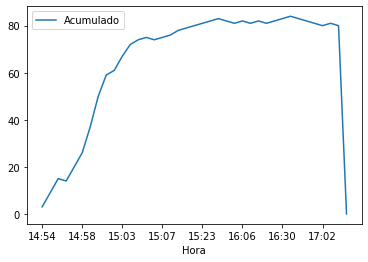

In [5]:
agrupados.plot.line('Hora', 'Acumulado');

<ipython-input-6-6a22c538e76d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 11)


Número Máximo de Asistentes: 84
Valor mas repetido: 0 days 02:06:00
Tiempo promedio: 0 days 01:52:56.703296703


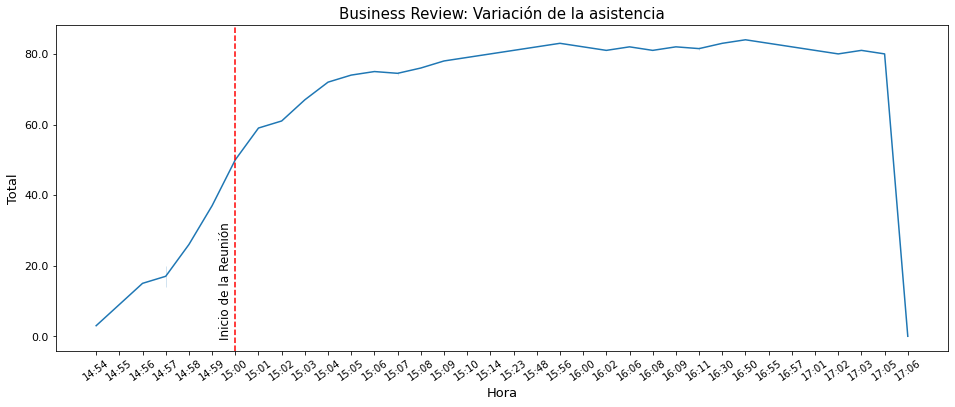

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.figure(figsize=(16,6))

x['Tiempo']=x['Hora de salida']-x['Hora de Unión']
meant=x['Tiempo'].mean()
asist_max=agrupados['Acumulado'].max()
med=x['Tiempo'].median()

ax=sns.lineplot(data=agrupados, x="Hora", y="Acumulado") #relational plot
ax.tick_params(axis='x', rotation=35)
ax.set_yticklabels(ax.get_yticks(), size = 11)
ax.axes.set_title("Business Review: Variación de la asistencia",fontsize=15)
ax.set_xlabel("Hora",fontsize=13)
ax.set_ylabel("Total",fontsize=13)
plt.axvline(6, color='red', linestyle='--')
plt.text(5.3,0,'Inicio de la Reunión',rotation=90, fontsize='12')
print('Número Máximo de Asistentes: {}'.format(asist_max))
print('Valor mas repetido: {}'.format(med))
print('Tiempo promedio: {}'.format(meant));

In [7]:
import pandas as pd


df = pd.DataFrame({'my_dates':['2015-01-01','2015-01-02','2015-01-03'],'myvals':[1,2,3]})
df['my_dates'] = pd.to_datetime(df['my_dates'])

df['day_of_week'] = df['my_dates'].dt.day_name()
df

,my_dates,myvals,day_of_week
0,2015-01-01,1,Thursday
1,2015-01-02,2,Friday
2,2015-01-03,3,Saturday


In [8]:
import pandas as pd
uso=pd.read_csv('Uso_plat.csv', parse_dates=['Fecha'])
uso['dia']=uso['Fecha'].dt.day_name()
uso['mes']=uso['Fecha'].dt.month_name()
uso['Hora'] = [d.time() for d in uso['Fecha']]
uso['Hora']=uso['Hora'].apply(lambda t: t.strftime('%H'))
uso.head()

,Fecha,Hora de finalización,Correo electrónico,Nombre,Matricula,Ingreso,Modelo,Campus,Programa,Correo electrónico2,Teléfono de contacto,Calificacion,Comentario,dia,mes,Hora
0,2021-04-28 18:07:48,4/28/21 18:09:56,anonymous,Rodrigo Teran Garza,440259488,mayo 2021,Posgrado 100% en línea (OM),Cumbres,Maestria en Educacion Basada en Competencias,rteran44@gmail.com,8116731720,5,.,Wednesday,April,18
1,2021-04-28 18:07:50,4/28/21 18:10:00,anonymous,Sánchez Lorenzo Idiana Denisse,040204627,mayo 2021,Licenciatura ejecutiva 100% en línea (XO),Tlalpan,Ingeniería en Ciencia de Datos,essinedi@gmail.com,5548642894,5,Es un perfecto curso para introducirnos a las ...,Wednesday,April,18
2,2021-04-28 18:07:54,4/28/21 18:10:31,anonymous,Rosado Duran Maria Elena,880144621,mayo 2021,Licenciatura ejecutiva 100% en línea (XO),Toluca,Ingenieria en diseño de SW y redes,elenasamchak@gmail.com,5513533186,5,Mejorar el envío de la información por email y...,Wednesday,April,18
3,2021-04-28 18:08:46,4/28/21 18:10:42,anonymous,Rodriguez Chapa Rosaura Alicia,840144475,mayo 2021,Posgrado 100% en línea (OM),Toluca,Maestría en Educación orientación tutoria,rosaura.rdzchapa@gmail.com,8117258364,5,Necesito mas tiempo para conocer la plataforma,Wednesday,April,18
4,2021-04-28 18:09:50,4/28/21 18:11:37,anonymous,Miranda Palacios Angelina,480049662,mayo 2021,Licenciatura ejecutiva 100% en línea (XO),Veracruz,Ingeniería en ciencia de datos,ange_mp@hotmail.com,7441233933,5,Todo bien hasta el momento gracias,Wednesday,April,18


In [9]:
uso['Hora'].value_counts()

19    301
11    278
12    275
18    245
20    244
21    223
15    104
22     87
16     52
13     28
23      2
08      1
14      1
00      1
17      1
Name: Hora, dtype: int64

In [10]:
uso.to_csv('C:/Users/Propietario/Desktop/Uso_plataforma.csv', index = False)